In [1]:
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error

In [3]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
gre=pd.read_csv('adm1.csv')

In [5]:
gre.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
gre=gre.drop('Serial No.',axis=1)

In [7]:
gre.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
import sklearn

In [9]:
X = gre.drop('Chance of Admit ',axis=1)
y=gre['Chance of Admit ']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
lin = LinearRegression().fit(X_train,y_train)
print((y_test - lin.predict(X_test)).apply(abs).mean())

0.04225256039189979


In [11]:
coef = pd.DataFrame({'column':X_test.columns,'coefficient':lin.coef_*100}).sort_values('coefficient').reset_index()
coef.drop('index',axis=1)

,column,coefficient
0,GRE Score,0.138341
1,TOEFL Score,0.268634
2,SOP,0.544265
3,University Rating,0.723664
4,LOR,1.354611
5,Research,2.573442
6,CGPA,11.893466


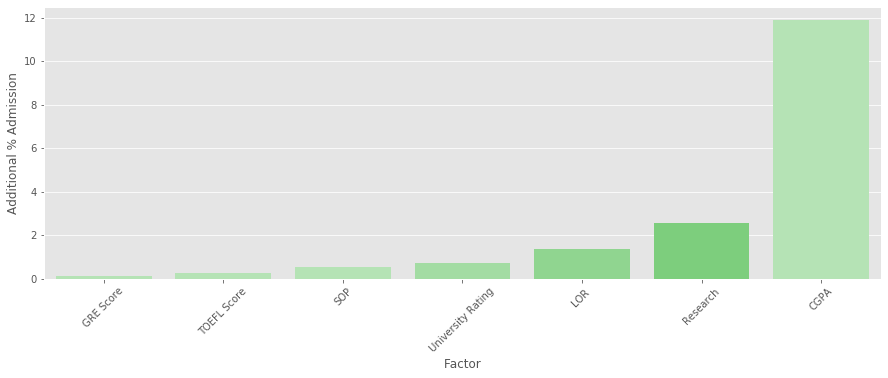

In [12]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,5))
plt.xticks(rotation=45)
colors=['#adebad','#adebad','#adebad','#99e699','#85e085','#70db70']
sns.barplot(coef['column'],coef['coefficient'],palette = colors)
plt.ylabel("Additional % Admission")
plt.xlabel('Factor')
plt.show()

In [13]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(lin, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

/Users/salonipatadia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/salonipatadia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.5307 ± 0.0982,CGPA
0.0497 ± 0.0170,GRE Score
0.0489 ± 0.0186,TOEFL Score
0.0278 ± 0.0088,LOR
0.0267 ± 0.0234,Research
0.0055 ± 0.0074,University Rating
0.0021 ± 0.0062,SOP


In [14]:
#pip install eli5

In [15]:
#pip install shap

In [16]:
import shap
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train,y_train)
explainer = shap.TreeExplainer(dtr)
shap_values = explainer.shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


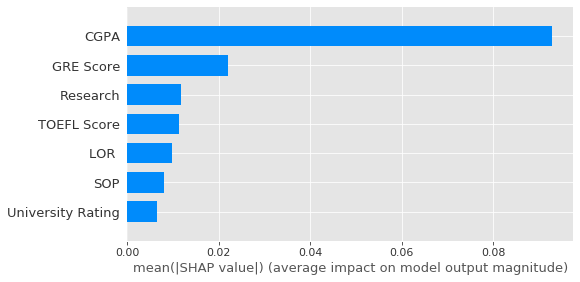

In [17]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [18]:
shap.initjs()

In [19]:
i=0
shap_values = explainer.shap_values(X_train.iloc[i])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[i])

In [20]:
i=1
shap_values = explainer.shap_values(X_train.iloc[i])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[i])

In [21]:
i=3
shap_values = explainer.shap_values(X_train.iloc[i])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[i])

In [22]:
i=2
shap_values = explainer.shap_values(X_train.iloc[i])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[i])

In [23]:
#pip install pdpbox

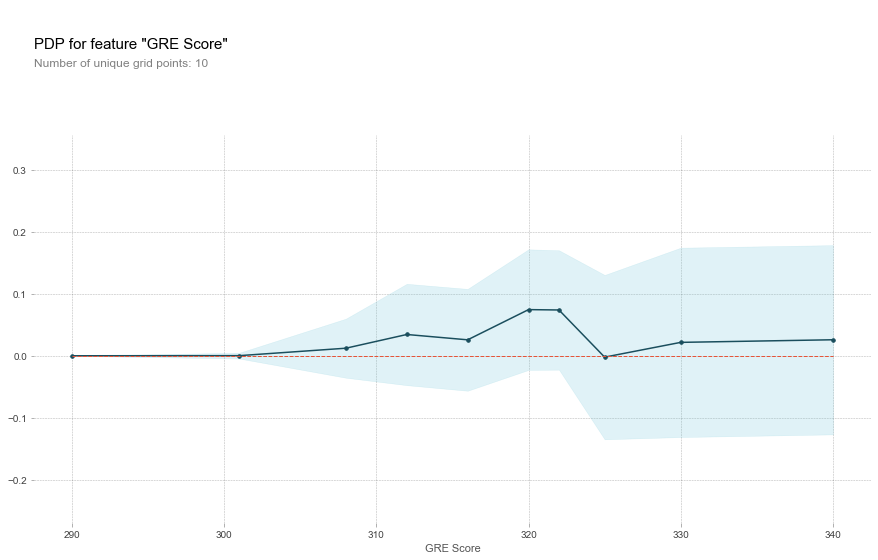

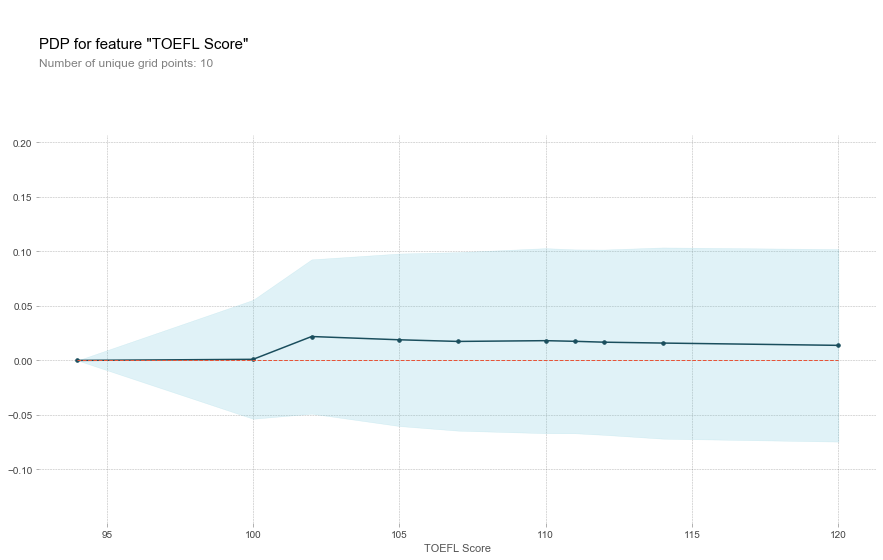

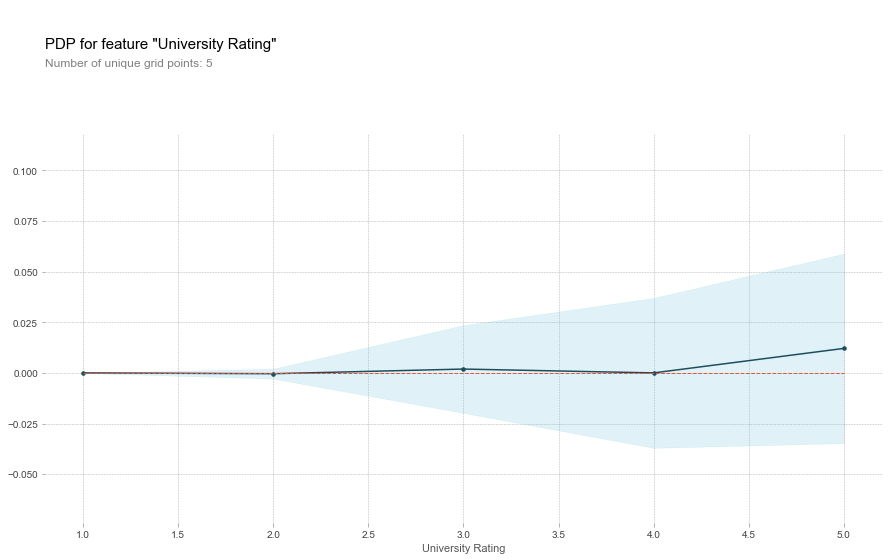

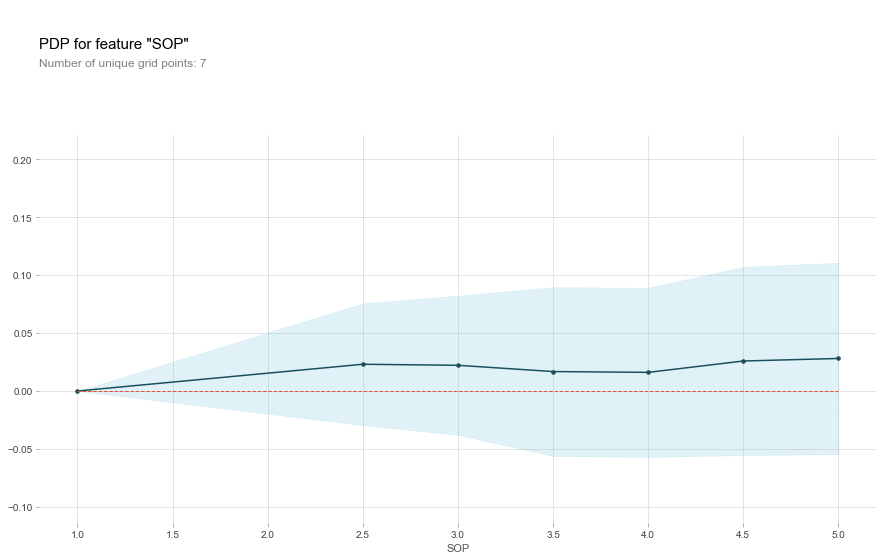

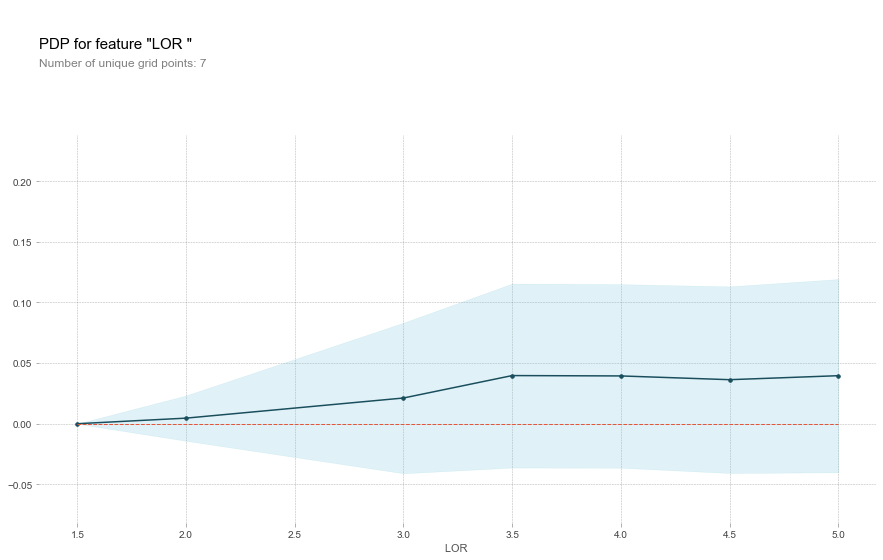

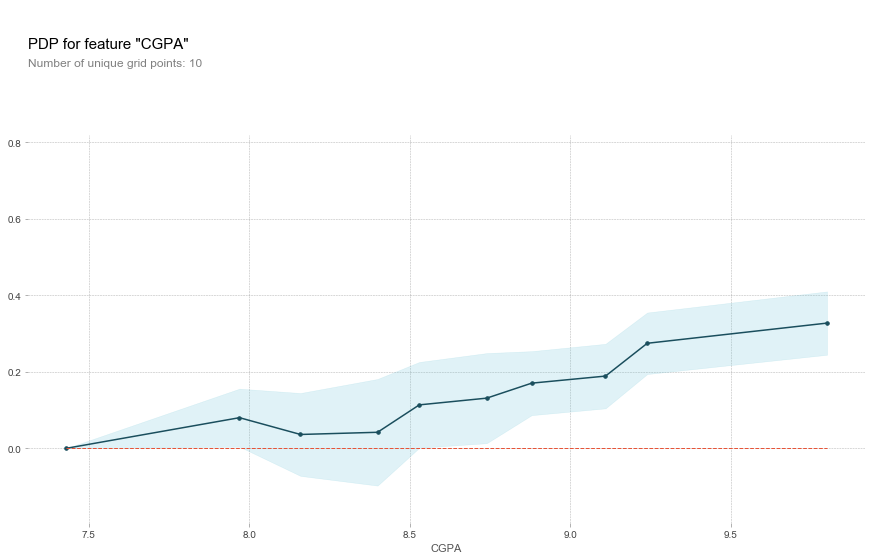

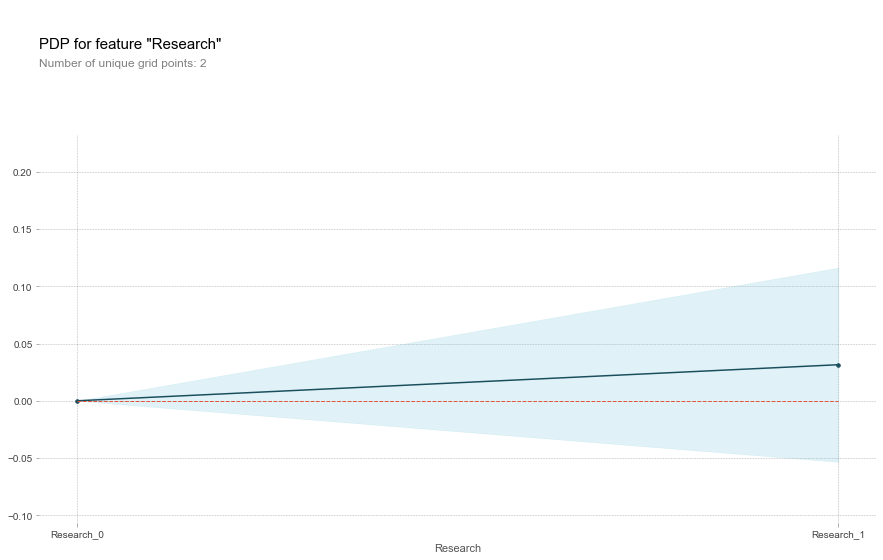

In [24]:
from pdpbox import pdp, info_plots
import matplotlib.pyplot as plt
base_features = gre.columns.values.tolist()
base_features.remove('Chance of Admit ')
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model=dtr, dataset=X_test,model_features=base_features, feature=feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

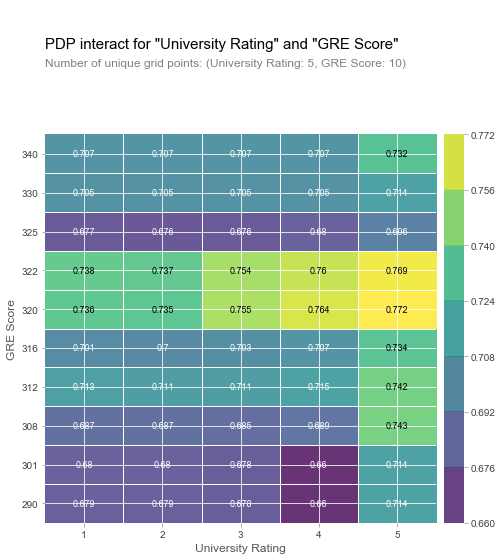

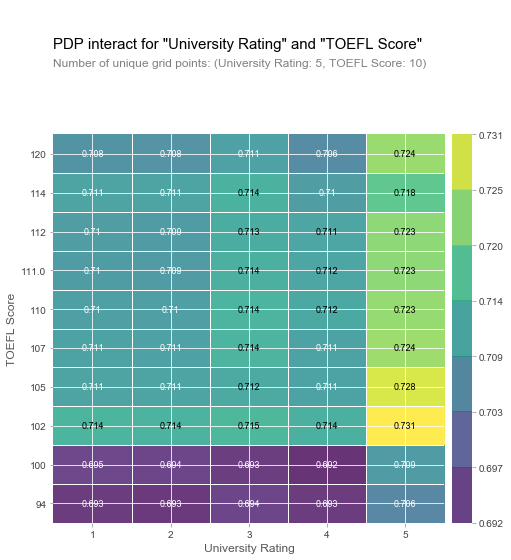

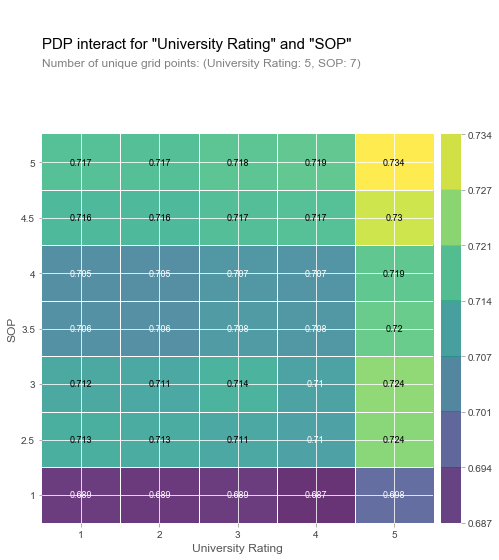

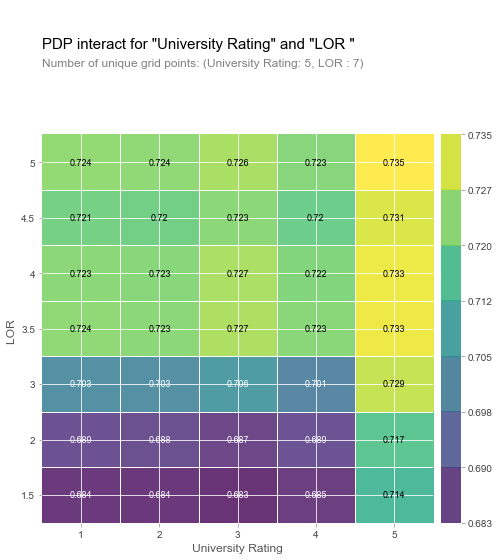

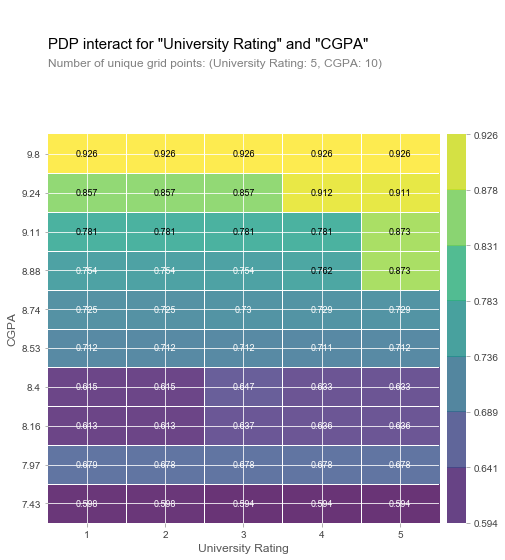

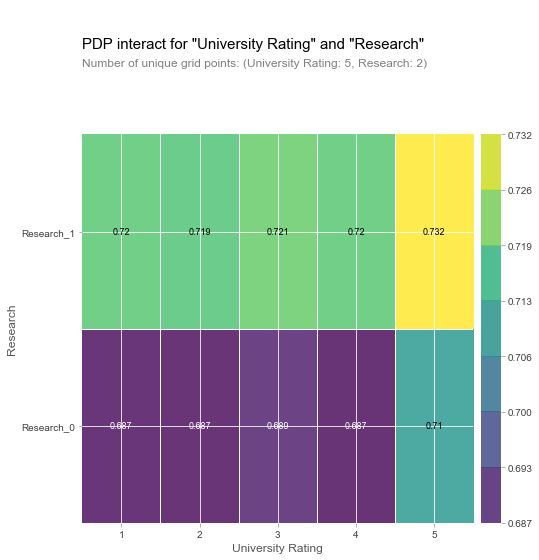

In [25]:
for column in X_test.columns.drop('University Rating'):
    features = ['University Rating',column]
    inter1  =  pdp.pdp_interact(model=dtr, dataset=X_test, model_features=base_features,features=features)
    pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features, plot_type='grid')
    plt.show()

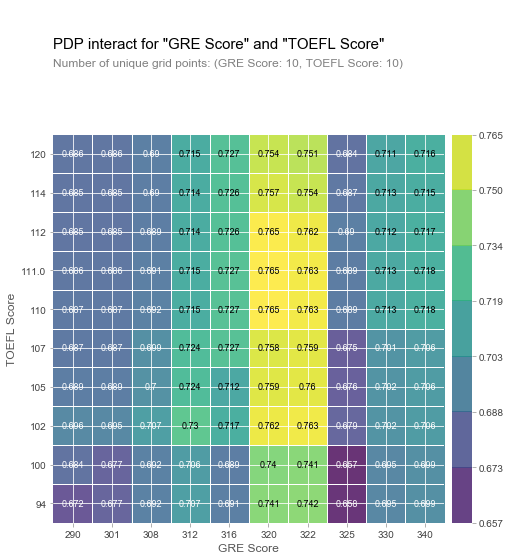

In [26]:
features = ['GRE Score','TOEFL Score']
inter1 = pdp.pdp_interact(model=dtr, dataset=X_test,
model_features=base_features, features=features)
pdp.pdp_interact_plot(pdp_interact_out=inter1,
feature_names=features, plot_type='grid')
plt.show()

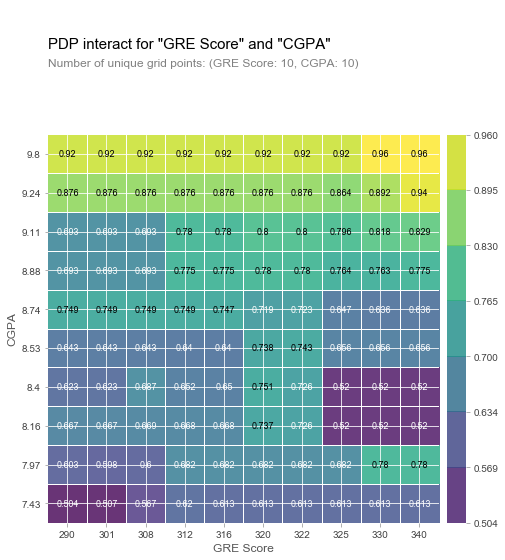

In [27]:
features = ['GRE Score','CGPA']
inter1  =  pdp.pdp_interact(model=dtr, dataset=X_test, model_features=base_features, 
                            features=features)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features, plot_type='grid')
plt.show()

In [28]:
gre.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000
